In [1]:
# vector_fields.py contains a bunch of tools to visualize vector fields and related objects
# this line is mainly needed to run the notebook in google colab or kaggle
!wget https://raw.githubusercontent.com/JeremiasE/worksheets-ode-2023/main/tools/vector_fields.py

--2023-04-27 16:39:46--  https://raw.githubusercontent.com/JeremiasE/worksheets-ode-2023/main/tools/vector_fields.py
CA-Zertifikat »/etc/ssl/certs/ca-certificates.crt« wurde geladen
Auflösen des Hostnamens raw.githubusercontent.com (raw.githubusercontent.com)… 2606:50c0:8003::154, 2606:50c0:8002::154, 2606:50c0:8001::154, ...
Verbindungsaufbau zu raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8003::154|:443 … verbunden.
HTTP-Anforderung gesendet, auf Antwort wird gewartet … 200 OK
Länge: 6780 (6,6K) [text/plain]
Wird in »vector_fields.py.2« gespeichert.

vector_fields.py.2  100%[===================>]   6,62K  --.-KB/s    in 0,002s  

2023-04-27 16:39:46 (3,02 MB/s) - »vector_fields.py.2« gespeichert [6780/6780]



In [2]:
import sympy
from sympy import sin,exp
from sympy.utilities import lambdify

import numpy as np
import matplotlib.pyplot as plt

import vector_fields 


In [3]:
sympy.var("x y t")

(x, y, t)

# Logistisches Wachstum

Wir betrachten das Anfangswertproblem
$\dot x = x(1-x), x(0)=x_0$.

Als Lösungen erhalten wir (siehe Harro Heuser: Gewöhnliche Differentialgleichungen, 6. Auflage, Seite 22)
\begin{align*}
    t \mapsto \frac{1}{\left(\frac{1}{x_{0}}-1\right) e^{- t} + 1}
\end{align*}

## Lösungsporträt

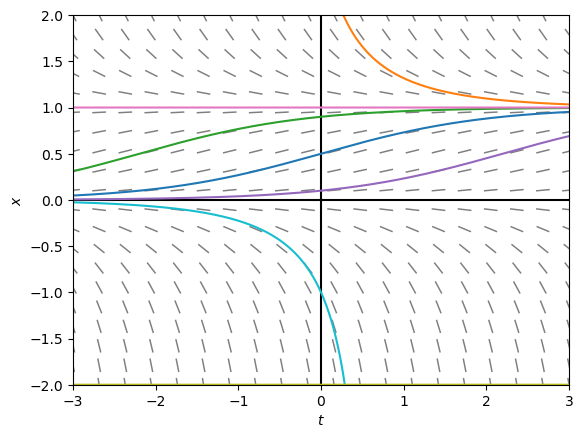

In [4]:
ax = vector_fields.plot_slope_field(x*(1-x),(t,-3,3),(x,-2,2),color="tab:grey")
ax.set_xlabel("$t$")
ax.set_ylabel("$x$")
vector_fields.add_central_axis(ax)
for x0, color in zip((0.1,0.5,0.9), ("tab:purple","tab:blue","tab:green")):
    vector_fields.plot(1/((1/x0-1)*exp(-t)+1),(t,-3,3),numpoints=5000,ax=ax, color=color)
x0 = 2.9
vector_fields.plot(1/((1/x0-1)*exp(-t)+1),(t,0,3),ax=ax, color="tab:orange")
x0= -1
vector_fields.plot(1/((1/x0-1)*exp(-t)+1),(t,-3,0.5),ax=ax, color="tab:cyan")
    
vector_fields.plot(1,(t,-3,3),ylimits=(-2,2),ax=ax, color="tab:pink")
    
vector_fields.plot(-2,(t,-3,3),ylimits=(-2,2),ax=ax, color="tab:olive")
ax.set_xlim(-3,3)
ax.set_ylim(-2,2)
plt.show()

## Lösungsfluss

In [5]:
f = sympy.Matrix([1,(1-y)*y])
vector_fields.field_player(f)